<h2>Model_Building</h2>

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [3]:
# df2['CROP'].value_counts()

In [4]:
df=pd.read_csv('updated_data.csv')

In [5]:
df.head()

,Unnamed: 0,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000.0,Rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000.0,Rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000.0,Rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000.0,Rice
4,4,69,37,42,23.058049,83.370118,7.073454,251.055000,Andaman and Nicobar,3500.0,Rice


In [6]:
df1=df

In [7]:
df1=df1.sample(frac=1)
df1.head()

,Unnamed: 0,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
2169,2169,34,48,48,41.042244,91.372581,6.805277,181.527598,Uttar Pradesh,1572.055556,Papaya
1525,1525,33,14,8,21.032001,92.964197,7.684420,110.682394,Uttar Pradesh,1200.000000,Orange
246,246,49,71,76,19.710983,17.638794,6.613072,85.579254,Haryana,3000.000000,ChickPea
774,774,31,60,24,25.404744,65.856754,7.722336,51.920573,Maharashtra,3.000000,Lentil
730,730,21,80,20,28.206673,68.270852,7.350870,64.328871,Maharashtra,2000.000000,Blackgram


In [8]:
df1.drop('Unnamed: 0', axis=1,inplace=True)
# df1.info()

In [9]:
df2=df1

In [10]:
y=df2['CROP']
x=df2.drop('CROP', axis=1)

In [11]:
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE
2169,34,48,48,41.042244,91.372581,6.805277,181.527598,Uttar Pradesh,1572.055556
1525,33,14,8,21.032001,92.964197,7.684420,110.682394,Uttar Pradesh,1200.000000
246,49,71,76,19.710983,17.638794,6.613072,85.579254,Haryana,3000.000000
774,31,60,24,25.404744,65.856754,7.722336,51.920573,Maharashtra,3.000000
730,21,80,20,28.206673,68.270852,7.350870,64.328871,Maharashtra,2000.000000


In [12]:

from sklearn.preprocessing import OneHotEncoder

categorical_feature = 'STATE'

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoded_data = pd.DataFrame(encoder.fit_transform(x[[categorical_feature]]))

new_column_names = encoder.get_feature_names_out([categorical_feature])

#creating new columns and appending the new encoded columns to the dataset.
for i in range(len(new_column_names)):
    x[new_column_names[i]] = encoded_data.iloc[:, i]

# Now categorical feature is one-hot encoded
print(x)


      N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph    RAINFALL  \
2169      34      48      48    41.042244  91.372581  6.805277  181.527598   
1525      33      14       8    21.032001  92.964197  7.684420  110.682394   
246       49      71      76    19.710983  17.638794  6.613072   85.579254   
774       31      60      24    25.404744  65.856754  7.722336   51.920573   
730       21      80      20    28.206673  68.270852  7.350870   64.328871   
...      ...     ...     ...          ...        ...       ...         ...   
1005      95      82      48    27.394896  83.311720  5.719015   92.781336   
881        5      24      40    24.692258  93.870301  6.297908  104.673545   
551        9      59      25    30.393213  60.162995  7.699201   35.374932   
171       99      38      21    22.883309  71.597224  6.352472   67.727773   
224       22      78      76    17.848517  19.091729  8.621663   76.324707   

              STATE   CROP_PRICE  STATE_Andaman and Nicobar  ..

In [13]:
x.drop('STATE', axis=1, inplace=True) # Duplicate category
x.drop('CROP_PRICE', axis=1, inplace=True) #outdated data in this field

In [14]:
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
2169,34,48,48,41.042244,91.372581,6.805277,181.527598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1525,33,14,8,21.032001,92.964197,7.684420,110.682394,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246,49,71,76,19.710983,17.638794,6.613072,85.579254,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
774,31,60,24,25.404744,65.856754,7.722336,51.920573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,21,80,20,28.206673,68.270852,7.350870,64.328871,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


splitting data into Train, Validation and test

In [15]:
tr_no=int(0.7*len(x))

train_x=x[:tr_no]

test_x=x[tr_no:]

train_y=y[:tr_no]

test_y=y[tr_no:]


In [17]:
train_x

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
2169,34,48,48,41.042244,91.372581,6.805277,181.527598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1525,33,14,8,21.032001,92.964197,7.684420,110.682394,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246,49,71,76,19.710983,17.638794,6.613072,85.579254,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
774,31,60,24,25.404744,65.856754,7.722336,51.920573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,21,80,20,28.206673,68.270852,7.350870,64.328871,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,29,22,43,19.663298,87.951581,5.561852,106.038081,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56,99,55,35,21.723831,80.238990,6.501698,277.962619,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
633,34,35,21,28.445250,82.676395,6.684381,58.187132,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1692,26,10,33,28.272981,96.936495,6.070718,198.823486,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3>Navie Bayes</h3>

In [18]:
model = GaussianNB()

In [19]:
model.fit(train_x, train_y)

GaussianNB()

In [20]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 717 to 224
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   N_SOIL                     660 non-null    int64  
 1   P_SOIL                     660 non-null    int64  
 2   K_SOIL                     660 non-null    int64  
 3   TEMPERATURE                660 non-null    float64
 4   HUMIDITY                   660 non-null    float64
 5   ph                         660 non-null    float64
 6   RAINFALL                   660 non-null    float64
 7   STATE_Andaman and Nicobar  660 non-null    float64
 8   STATE_Andhra Pradesh       660 non-null    float64
 9   STATE_Assam                660 non-null    float64
 10  STATE_Chattisgarh          660 non-null    float64
 11  STATE_Goa                  660 non-null    float64
 12  STATE_Gujarat              660 non-null    float64
 13  STATE_Haryana              660 non-null    float

In [21]:
testing_y=model.predict(test_x)

In [23]:
accuracy = accuracy_score(test_y, testing_y)
precision = precision_score(test_y, testing_y, average='weighted')
recall = recall_score(test_y, testing_y, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Accuracy: 0.8409
Precision: 0.8475
Recall: 0.8409


<h3>Random Forests</h3>

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
train_x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE_Andaman and Nicobar,STATE_Andhra Pradesh,STATE_Assam,...,STATE_Odisha,STATE_Pondicherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttrakhand,STATE_West Bengal
2169,34,48,48,41.042244,91.372581,6.805277,181.527598,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1525,33,14,8,21.032001,92.964197,7.684420,110.682394,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
246,49,71,76,19.710983,17.638794,6.613072,85.579254,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
774,31,60,24,25.404744,65.856754,7.722336,51.920573,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
730,21,80,20,28.206673,68.270852,7.350870,64.328871,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
model1=RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(train_x, train_y)
testing_y1=model1.predict(test_x)

In [28]:
accuracy = accuracy_score(test_y, testing_y1)
precision = precision_score(test_y, testing_y1, average='weighted')
recall = recall_score(test_y, testing_y1, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9924
Precision: 0.9933
Recall: 0.9924


<h4>Dumping this model as a pickle file in the folder</h4>

In [29]:
pip install pickle



Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [31]:
import pickle as pickle

In [32]:
pickle.dump(model1, open('RNDFRST.pkl', 'wb'))

<h4>Evaluating why Random forest did significantly better than Naive bayes (99.3% >> 84%) Accuracy</h4> 
-There are a few assumptions that naive bayes makes when making predictions<br>
        &nbsp;&nbsp;&nbsp;&nbsp; ->Gausian distribution (Since we are using the gaussian classifier)<br>
        &nbsp;&nbsp;&nbsp;&nbsp; ->The parameters/Features in the dataset are independent from one another 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 503 to 412
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   float64
 9   CROP         2200 non-null   object 
dtypes: float64(5), int64(3), object(2)
memory usage: 189.1+ KB


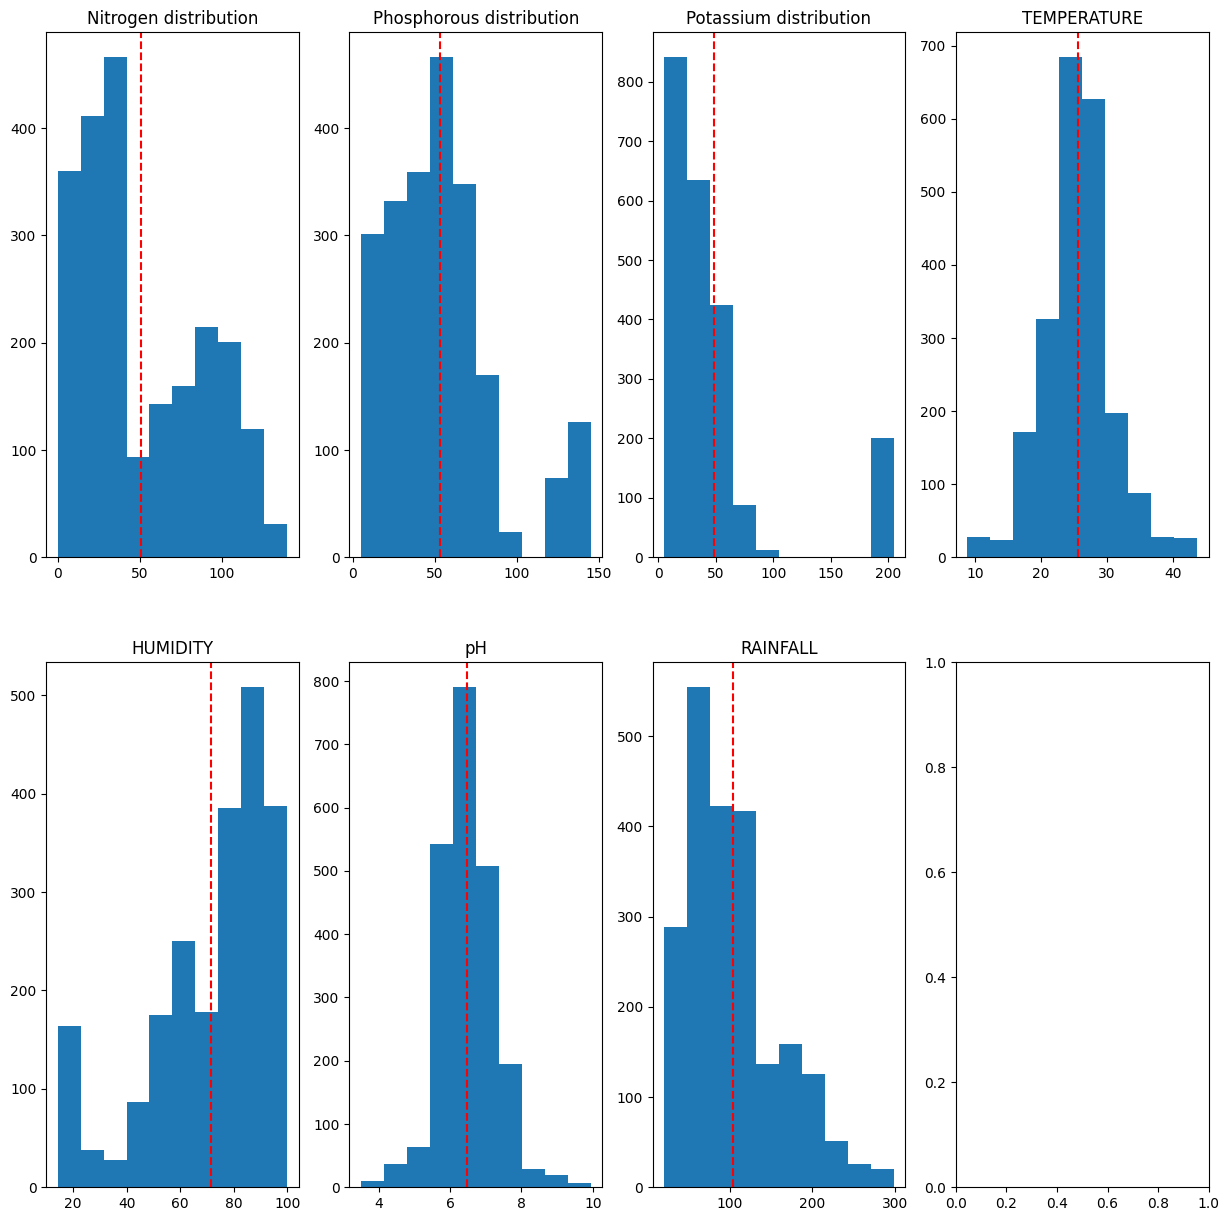

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes= plt.subplots(2,4, figsize=(15,15))
axes[0][0].hist(df2['N_SOIL'])
axes[0][0].axvline(x=df2['N_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][0].set_title('Nitrogen distribution')

axes[0][1].hist(df2['P_SOIL'])
axes[0][1].axvline(x=df2['P_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][1].set_title('Phosphorous distribution')

axes[0][2].hist(df2['K_SOIL'])
axes[0][2].axvline(x=df2['K_SOIL'].mean(), color='Red', linestyle='dashed')
axes[0][2].set_title('Potassium distribution')

axes[0][3].hist(df2['TEMPERATURE'])
axes[0][3].axvline(x=df2['TEMPERATURE'].mean(), color='Red', linestyle='dashed')
axes[0][3].set_title('TEMPERATURE')

axes[1][0].hist(df2['HUMIDITY'])
axes[1][0].axvline(x=df2['HUMIDITY'].mean(), color='Red', linestyle='dashed')
axes[1][0].set_title('HUMIDITY')

axes[1][1].hist(df2['ph'])
axes[1][1].axvline(x=df2['ph'].mean(), color='Red', linestyle='dashed')
axes[1][1].set_title('pH')

axes[1][2].hist(df2['RAINFALL'])
axes[1][2].axvline(x=df2['RAINFALL'].mean(), color='Red', linestyle='dashed')
axes[1][2].set_title('RAINFALL')


plt.show()


<h5>Here we can see only two features follow the normal distribution</h5>
&nbsp;&nbsp;&nbsp;&nbsp;->Temperature<br>
&nbsp;&nbsp;&nbsp;&nbsp;->pH <br><br>
which may be the reason for the poorer perfomance of the naive bayes algorithm comparetively

<h3>Employing SVM classifier </h3>  #COME BACK TO THIS LATER


Retrieving the vector/matrix with high probabilities.

In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1760 entries, 503 to 195
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   N_SOIL                     1760 non-null   int64  
 1   P_SOIL                     1760 non-null   int64  
 2   K_SOIL                     1760 non-null   int64  
 3   TEMPERATURE                1760 non-null   float64
 4   HUMIDITY                   1760 non-null   float64
 5   ph                         1760 non-null   float64
 6   RAINFALL                   1760 non-null   float64
 7   STATE_Andaman and Nicobar  1760 non-null   float64
 8   STATE_Andhra Pradesh       1760 non-null   float64
 9   STATE_Assam                1760 non-null   float64
 10  STATE_Chattisgarh          1760 non-null   float64
 11  STATE_Goa                  1760 non-null   float64
 12  STATE_Gujarat              1760 non-null   float64
 13  STATE_Haryana              1760 non-null   floa

In [ ]:
# df=pd.DataFrame({
#     ''
# })

In [ ]:

predicted_proba = model1.predict_proba(train_x[:1])

# for i in range(4):
#     for j in range(22):
#         if(predicted_proba[i][j]>=0.2 and predicted_proba[i][j]<0.95):
#             print(f"{i}: {predicted_proba[i]}")
#             print("\n")
#             break

predicted_proba


array([[0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01,
        0.  , 0.01, 0.88, 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.  , 0.  ]])

In [ ]:
labels=model1.classes_
labels

array(['Apple', 'Banana', 'Blackgram', 'ChickPea', 'Coconut', 'Coffee',
       'Cotton', 'Grapes', 'Jute', 'KidneyBeans', 'Lentil', 'Maize',
       'Mango', 'MothBeans', 'MungBean', 'Muskmelon', 'Orange', 'Papaya',
       'PigeonPeas', 'Pomegranate', 'Rice', 'Watermelon'], dtype=object)